In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

/Users/fanggot/anaconda/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
import scipy as sp

In [5]:
data = np.random.rand(1000, 10)  # 500 entities, each contains 10 features
label = np.random.randint(2, size=1000)  # binary target
train_data = lgb.Dataset(data, label=label)

In [6]:
param = {'num_leaves':5, 'objective':'binary'}

In [7]:
param['metric'] = 'auc'

In [8]:
num_round = 10
rst = lgb.cv(param, train_data, num_round, nfold=5)

In [9]:
num_round = 10
bst = lgb.train(param, train_data, num_round)

In [10]:
bst.predict(data = np.random.rand(7, 10))

array([0.44891314, 0.49297494, 0.47734607, 0.49844786, 0.47421668,
       0.47496   , 0.5087721 ])

In [11]:
traindata = np.random.normal(size=(2000,10))

In [12]:
testdata = np.random.normal(size=(10000,10))

In [13]:
label = np.array([ 1 if np.dot(i,i) > 9.34 else 0 for i in traindata ])

In [14]:
label

array([0, 1, 1, ..., 0, 0, 1])

In [15]:
testlabel = np.array([ 1 if np.dot(i,i) > 9.34 else 0 for i in testdata ])

In [16]:
train_data = lgb.Dataset(traindata, label=label)
test_data = lgb.Dataset(testdata, label=testlabel)

In [17]:
param = {'objective': 'binary', 'num_leaves': 5, 'bagging_fraction': 0.7, 
         'learning_rate': 0.1, 'min_child_samples': 50, 'bagging_freq': 5, 'bagging_seed': 1111 }

In [18]:
bst = lgb.train(param, train_data, 1)

In [19]:
predf = bst.predict(testdata)

In [20]:
predb = [1 if i>.5 else 0 for i in predf]

In [21]:
cm = confusion_matrix(testlabel, predb)
accuracy = accuracy_score(testlabel, predb)

In [22]:
cm

array([[3909, 1090],
       [2688, 2313]])

In [23]:
accuracy

0.6222

In [24]:
acclist = []
for j in range(1, 400):
    bst = lgb.train(param, train_data, j)
    predf = bst.predict(testdata)
    predb = [1 if i>.5 else 0 for i in predf]
#     cm = confusion_matrix(testlabel, predb)
    accuracy = accuracy_score(testlabel, predb)
#     print(accuracy)
    acclist.append(accuracy)
# print(acclist)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


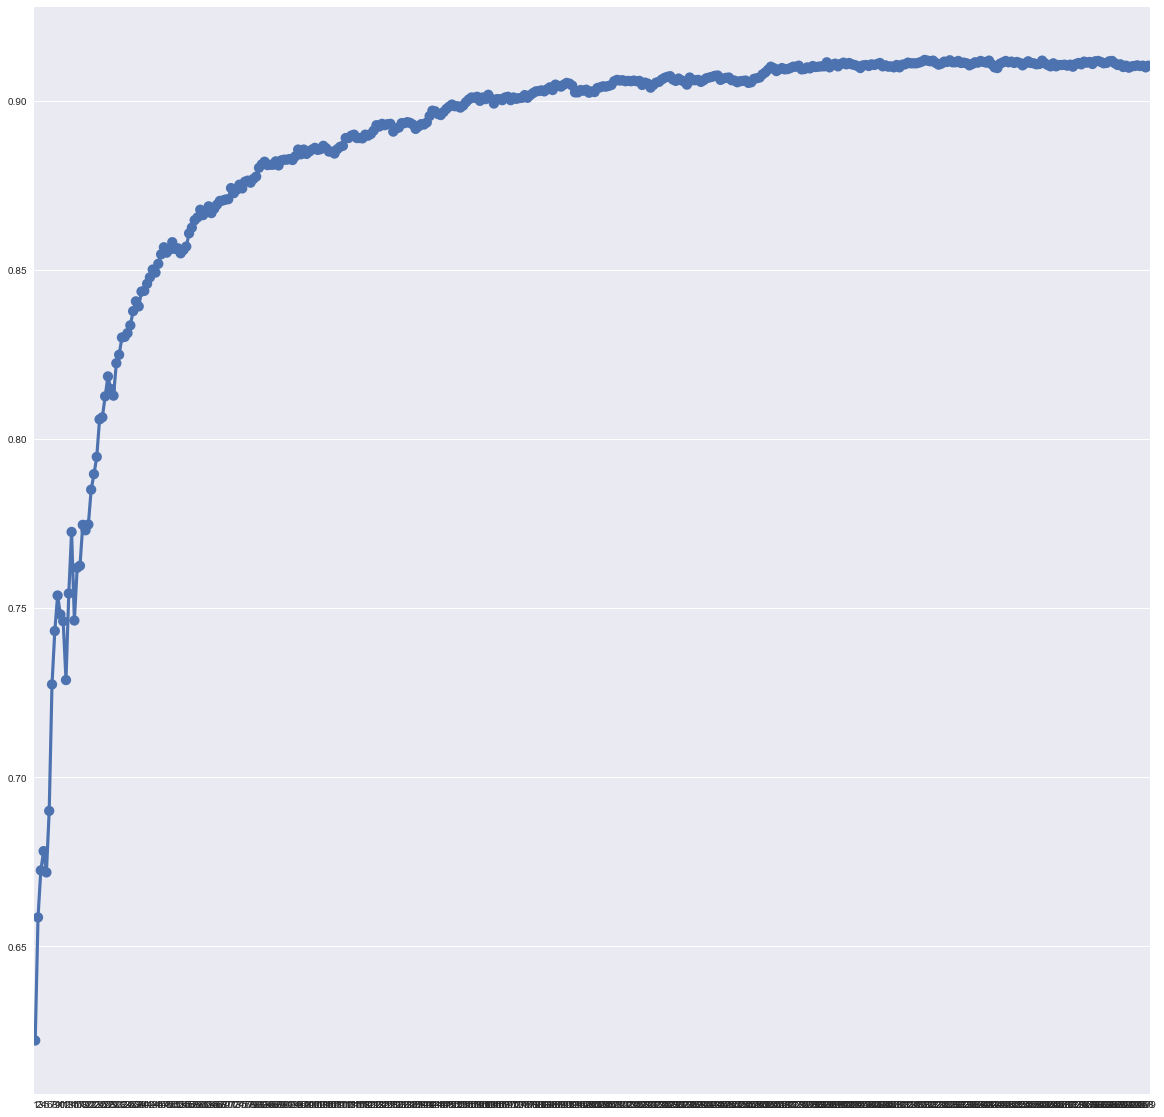

In [25]:
npalist = np.array(acclist)
plt.subplots(figsize=(20,20))
sns.pointplot(x = [i for i in range(1,400)], y = npalist)

In [26]:
bst = lgb.train(param, train_data, 1000, valid_sets= test_data, early_stopping_rounds=50
                , verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's binary_logloss: 0.344044
[200]	valid_0's binary_logloss: 0.263743
[300]	valid_0's binary_logloss: 0.227326
[400]	valid_0's binary_logloss: 0.215043
[500]	valid_0's binary_logloss: 0.210512
[600]	valid_0's binary_logloss: 0.206578
Early stopping, best iteration is:
[595]	valid_0's binary_logloss: 0.205464


In [27]:
predf = bst.predict(testdata, num_iteration=bst.best_iteration)
predb = [1 if i>.5 else 0 for i in predf]
cm = confusion_matrix(testlabel, predb)
accuracy = accuracy_score(testlabel, predb)

In [28]:
cm

array([[4518,  481],
       [ 418, 4583]])

In [29]:
accuracy

0.9101

In [30]:
testdata2 = np.random.normal(size=(10000,10))
testlabel2 = np.array([ 1 if np.dot(i,i) > 9.34 else 0 for i in testdata2 ])
test_data2 = lgb.Dataset(testdata2, label=testlabel2)

In [31]:
predf = bst.predict(testdata2, num_iteration=bst.best_iteration)
predb = [1 if i>.5 else 0 for i in predf]
cm = confusion_matrix(testlabel2, predb)
accuracy = accuracy_score(testlabel2, predb)

In [32]:
accuracy

0.9146

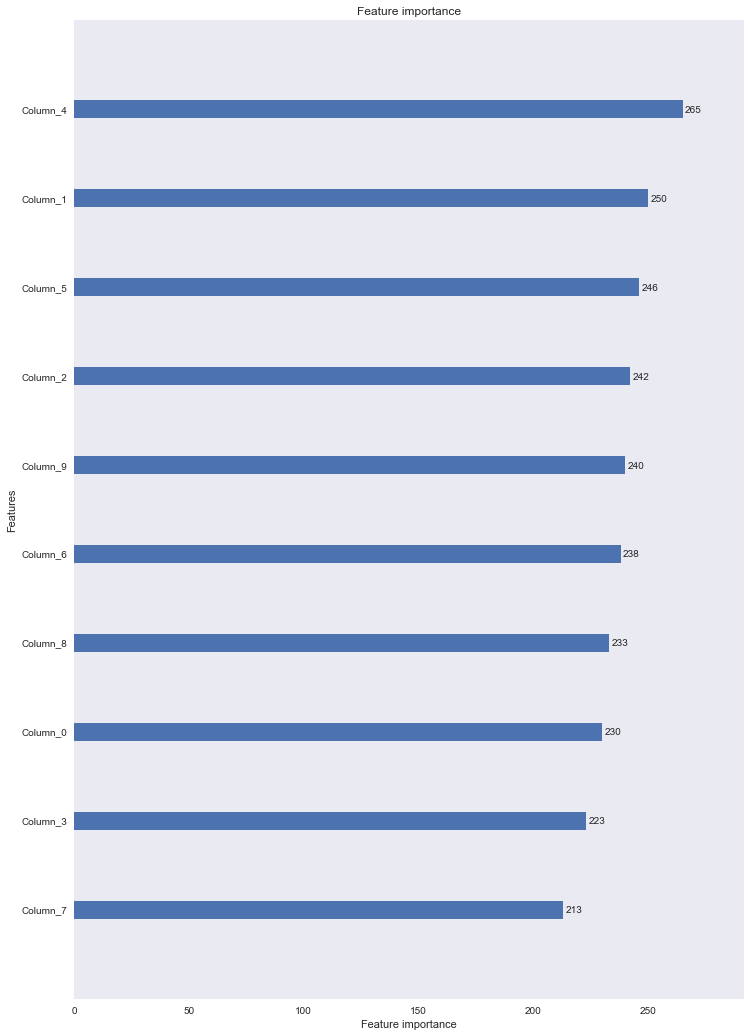

In [33]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(bst, ax = ax)
ax.grid(False)

In [34]:
lgb.cv(param, train_data, 500, nfold=5)

{'binary_logloss-mean': [0.683348661675958,
  0.6734615561670396,
  0.6647756725568412,
  0.6583548554498548,
  0.6487900573235041,
  0.6411177281312461,
  0.6329954247042282,
  0.6252423517517179,
  0.6198199552833943,
  0.6130065592321505,
  0.6060612279660891,
  0.5998530615154912,
  0.5940890724306886,
  0.5881920653003829,
  0.5832227566353312,
  0.5768025614624626,
  0.5715119605710883,
  0.5654681991237548,
  0.5603372036347594,
  0.5552349125280696,
  0.5499723099825353,
  0.5445841033338147,
  0.5402933162573559,
  0.5360322035593594,
  0.5312115433908688,
  0.5263448111019798,
  0.5220077409079567,
  0.5174875860900409,
  0.5133616025298924,
  0.5091312528828565,
  0.5050106099193772,
  0.5006200363815124,
  0.4977834598299552,
  0.49470699428300796,
  0.4907082182308928,
  0.48647949064333507,
  0.4827640519321803,
  0.479415838602052,
  0.4763577452540895,
  0.4729032608917431,
  0.46873772847792095,
  0.4657858867814075,
  0.46235465484075816,
  0.4595371732256254,
  0.456

In [42]:
testdata1 = np.random.normal(size=(10000,10))
testlabel1 = np.array([ 1 if np.dot(i[:-1],i[:-1]) > 9.34 else 0 for i in testdata1 ])
test_data1 = lgb.Dataset(testdata1, label=testlabel1)

In [43]:
traindata1 = np.random.normal(size=(5000,10))
trainlabel1 = np.array([ 1 if np.dot(i[:-1],i[:-1]) > 9.34 else 0 for i in traindata1 ])
train_data1 = lgb.Dataset(traindata1, label=trainlabel1)

In [44]:
bst = lgb.train(param, train_data1, 1000, valid_sets= test_data1, early_stopping_rounds=50
                , verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's binary_logloss: 0.315586
[200]	valid_0's binary_logloss: 0.228548
[300]	valid_0's binary_logloss: 0.187578
[400]	valid_0's binary_logloss: 0.16307
[500]	valid_0's binary_logloss: 0.147774
[600]	valid_0's binary_logloss: 0.137076
[700]	valid_0's binary_logloss: 0.130777
[800]	valid_0's binary_logloss: 0.125035
[900]	valid_0's binary_logloss: 0.121948
[1000]	valid_0's binary_logloss: 0.119735
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.119735


In [45]:
testdata2 = np.random.normal(size=(10000,10))
testlabel2 = np.array([ 1 if np.dot(i[:-1],i[:-1]) > 9.34 else 0 for i in testdata2 ])
test_data2 = lgb.Dataset(testdata2, label=testlabel2)

In [46]:
predf = bst.predict(testdata2, num_iteration=bst.best_iteration)
predb = [1 if i>.5 else 0 for i in predf]
cm = confusion_matrix(testlabel2, predb)
accuracy = accuracy_score(testlabel2, predb)

In [47]:
accuracy

0.9539

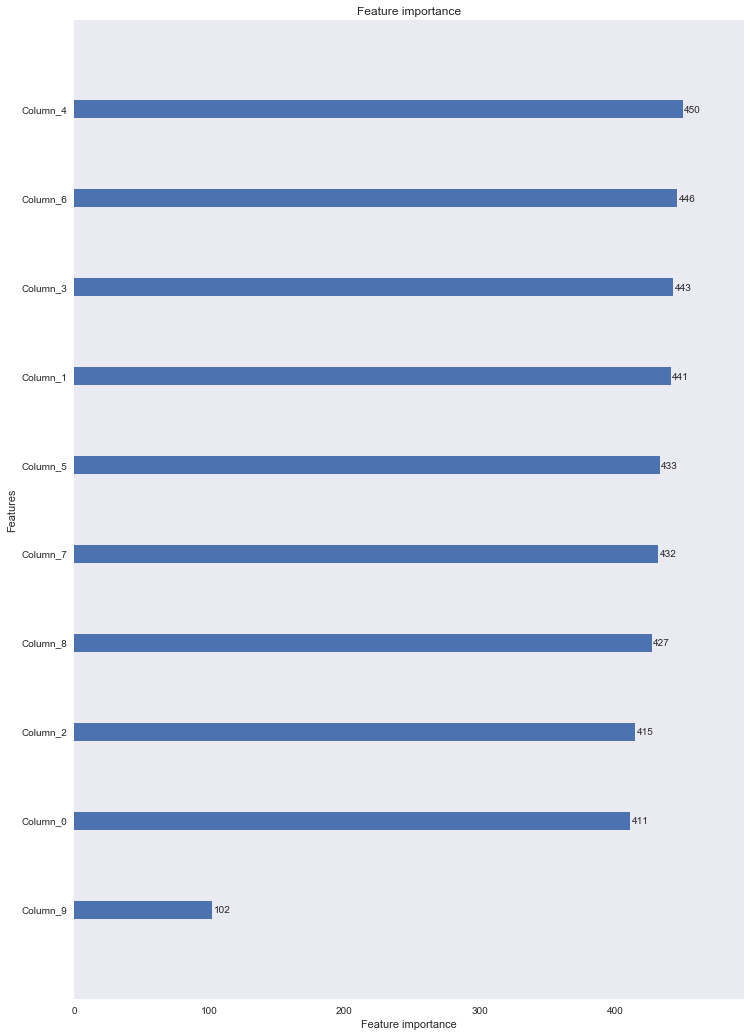

In [48]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(bst, ax = ax)
ax.grid(False)